In [1]:
#1 reading data and covert to df
from scipy.io import wavfile
import numpy as np
import pandas as pd
import warnings


In [2]:
wave_seq = pd.read_csv("Training_X.csv") 
#dataset = wave_seq
label = pd.read_csv("Training_Y.csv")
#dataset["label"] = label
label.index += 1
#rows_with_null = wave_seq[wave_seq.isnull().any(axis=1)]
#print(rows_with_null)
wave_seq=wave_seq.dropna()
#print(label)
#x_1 = wave_seq[wave_seq["Id"] == 15]
print(label)



    x
1   L
2   L
3   R
4   L
5   R
.. ..
69  R
70  R
71  L
72  L
73  R

[73 rows x 1 columns]


In [3]:
def check_for_nan(df):
    check = df.isnull().sum().sum()
    if check == 0:
        print("No nulls")
    else:
        print("Nulls exist")

check_for_nan(wave_seq)

No nulls


In [4]:
# downsampling

def downsample_dataframe(dataframe, new_sample_rate):
    downsampling_factor = int(dataframe.shape[0] / new_sample_rate)
    downsampled_dataframe = dataframe.iloc[::downsampling_factor, :]
    return downsampled_dataframe


def downsample_process(inputdf, ds_df):
    if inputdf.shape[0] - ds_df.shape[0] != 0:
        return print("downsample complete")
    else:
        return print("downsample not work")
    
downsampled_df = downsample_dataframe(wave_seq, 350)



In [5]:
#feature extraction

#pip install tsfresh
from tsfresh import extract_features 
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters, settings

import tsfresh

ext_feature_df = extract_features(downsampled_df,column_id="Id",column_sort="Time",
                                  default_fc_parameters=ComprehensiveFCParameters(),
                                  n_jobs=0)

ext_feature_clean = ext_feature_df.dropna(axis = 1, how = "any")
ext_feature_clean.head()



Feature Extraction: 100%|███████████████████████| 73/73 [00:03<00:00, 22.35it/s]


,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,...,Values__lempel_ziv_complexity__bins_2,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100
1,1.0,0.0,0.0,0.0,143.0,495747.0,498.00,-15.50,-20.0,28.6,...,0.6,0.8,0.6,0.6,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
2,1.0,0.0,0.0,0.0,18.0,112048.0,243.75,-7.75,3.0,3.6,...,0.6,0.8,0.8,0.8,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
3,1.0,0.0,0.0,0.0,-298.0,215996.0,294.50,14.50,22.0,-59.6,...,0.6,0.6,0.6,0.8,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
4,1.0,0.0,0.0,0.0,365.0,136803.0,207.75,6.25,-1.0,73.0,...,0.6,0.6,0.8,0.8,1.0,0.636514,0.636514,1.098612,1.098612,1.098612
5,1.0,0.0,0.0,0.0,-208.0,188824.0,244.50,9.50,46.0,-41.6,...,0.6,0.6,0.6,0.6,1.0,0.636514,0.636514,1.098612,1.098612,1.098612


In [6]:
# data normalization,ignore all warning

warnings.filterwarnings('ignore')

from sklearn.preprocessing import minmax_scale
cols = ext_feature_clean.select_dtypes(np.number).columns
ext_feature_clean[cols] = minmax_scale(ext_feature_clean[cols])


In [7]:

ext_feature_clean["label"] = label
ext_feature_clean.head()

,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,...,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100,label
1,0.0,0.0,0.0,0.0,0.636112,0.098955,0.292965,0.484003,0.502013,0.584118,...,0.5,0.0,0.0,1.0,1.0,1.00000,1.0,1.0,1.0,L
2,0.0,0.0,0.0,0.0,0.578535,0.022105,0.129618,0.495905,0.563758,0.531247,...,0.5,0.5,0.5,1.0,1.0,1.00000,1.0,1.0,1.0,L
3,0.0,0.0,0.0,0.0,0.432980,0.042924,0.162223,0.530074,0.614765,0.397589,...,0.0,0.0,0.5,1.0,1.0,1.00000,1.0,1.0,1.0,R
4,0.0,0.0,0.0,0.0,0.738369,0.027063,0.106489,0.517405,0.553020,0.678016,...,0.0,0.5,0.5,1.0,1.0,0.57938,1.0,1.0,1.0,L
5,0.0,0.0,0.0,0.0,0.474436,0.037482,0.130100,0.522396,0.679195,0.435656,...,0.0,0.0,0.0,1.0,1.0,0.57938,1.0,1.0,1.0,R


In [8]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

main = ext_feature_clean

# Separate the features (X) and the target variable (y)
X = main.drop(columns="label")
y = main["label"]

# Encode the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Remove constant or near-constant features
filter1 = VarianceThreshold(threshold=0.01)
X_filter1 = filter1.fit_transform(X)
concol1 = [column for column in X.columns if column not in X.columns[filter1.get_support()]]
X_1 = X.drop(concol1,axis=1)
X_1


,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,...,Values__lempel_ziv_complexity__bins_2,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100
1,0.636112,0.098955,0.292965,0.484003,0.502013,0.584118,1.000000,0.301933,0.127747,0.099920,...,0.333333,0.500,0.000,0.000,1.0,1.0,1.00000,1.00000,1.00000,1.0
2,0.578535,0.022105,0.129618,0.495905,0.563758,0.531247,1.000000,0.132769,0.183605,0.022411,...,0.333333,0.500,0.500,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
3,0.432980,0.042924,0.162223,0.530074,0.614765,0.397589,1.000000,0.183811,0.101640,0.040019,...,0.333333,0.000,0.000,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
4,0.738369,0.027063,0.106489,0.517405,0.553020,0.678016,1.000000,0.131505,0.111448,0.022038,...,0.333333,0.000,0.500,0.500,1.0,1.0,0.57938,1.00000,1.00000,1.0
5,0.474436,0.037482,0.130100,0.522396,0.679195,0.435656,1.000000,0.174225,0.099410,0.036331,...,0.333333,0.000,0.000,0.000,1.0,1.0,0.57938,1.00000,1.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.508061,0.029071,0.082022,0.718198,0.720805,0.452258,0.666667,0.172953,0.097539,0.035855,...,0.583333,0.375,0.375,0.375,1.0,1.0,0.57938,1.00000,1.00000,1.0
70,0.384155,0.044408,0.123675,0.560788,0.330201,0.352755,1.000000,0.179899,0.103326,0.038492,...,0.333333,0.500,0.500,1.000,1.0,1.0,0.57938,1.00000,1.00000,1.0
71,0.276370,0.436516,0.459525,0.948938,0.354362,0.253780,1.000000,0.647080,0.098469,0.428199,...,0.333333,0.500,0.500,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
72,0.572087,0.152862,0.268391,0.766957,0.577181,0.525325,1.000000,0.381958,1.000000,0.155699,...,0.333333,0.500,0.500,1.000,1.0,1.0,0.57938,0.57938,0.57938,1.0


In [9]:
# Select the top k features using SelectKBest and f_regression
from sklearn.feature_selection import chi2, f_regression

filter2 = SelectKBest(score_func=f_regression,k=10)
X_filter2 = filter2.fit_transform(X_1, y_encoded)
filter_inx = filter2.get_support(indices=True)

concol2 = [column for column in X_1.columns 
          if column not in X_1.columns[filter_inx]]

#X_1 = X.drop(concol1,axis=1)
X_2 = X_1.drop(concol2,axis=1)
X_2

,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,0.319411,0.000000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,0.432443,0.000000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,0.516251,0.000000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,0.674890,0.000000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,0.355766,0.339450,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049
...,...,...,...,...,...,...,...,...,...,...
69,0.339151,0.000000,0.284855,0.000000,0.616162,0.000000,0.430000,0.415078,0.024834,0.500808
70,0.164688,0.066514,0.240569,0.128440,0.272054,0.077751,0.168000,0.508654,0.125000,0.749254
71,0.428626,0.000000,0.284855,0.000000,0.335690,0.003670,0.036500,0.246602,0.000000,0.196780
72,0.584073,0.000000,0.341717,0.079511,0.237374,0.154081,0.236500,0.327173,0.176325,0.252230


In [10]:
selected_features = X_2.columns


In [11]:
# selected features

selected_features = X_2.columns

# selected_features_df
ind = ['label'] + list(selected_features)
selected_features_df = main[ind]
selected_features_df.head()


,label,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,L,0.319411,0.00000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,L,0.432443,0.00000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,R,0.516251,0.00000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,L,0.674890,0.00000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,R,0.355766,0.33945,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049


In [12]:
#final data check 
#clean_df = selected_features_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1,how = "any")

check_for_nan(selected_features_df)



No nulls


In [13]:
selected_features_df.to_csv('final.csv', index=False)


In [14]:
# EVALUATION
import os
import re
import librosa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import re
import librosa
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier


In [15]:
selected_features_df

,label,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,L,0.319411,0.000000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,L,0.432443,0.000000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,R,0.516251,0.000000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,L,0.674890,0.000000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,R,0.355766,0.339450,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049
...,...,...,...,...,...,...,...,...,...,...,...
69,R,0.339151,0.000000,0.284855,0.000000,0.616162,0.000000,0.430000,0.415078,0.024834,0.500808
70,R,0.164688,0.066514,0.240569,0.128440,0.272054,0.077751,0.168000,0.508654,0.125000,0.749254
71,L,0.428626,0.000000,0.284855,0.000000,0.335690,0.003670,0.036500,0.246602,0.000000,0.196780
72,L,0.584073,0.000000,0.341717,0.079511,0.237374,0.154081,0.236500,0.327173,0.176325,0.252230


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np

X = selected_features_df.drop(columns="label")
y = selected_features_df["label"]

cv = RepeatedKFold(n_splits=10, n_repeats=50, random_state=3888)

gnb = GaussianNB(var_smoothing=1e-5)
rf = RandomForestClassifier()
svm = svm.NuSVC(kernel='poly', degree=3)

#scoring
svm_scores = cross_val_score(svm, X, y, cv=cv,scoring='accuracy')
rf_scores = cross_val_score(rf, X, y, cv=cv,scoring='accuracy')
nb_scores = cross_val_score(gnb, X, y, cv=cv,scoring='accuracy')


In [17]:
X

,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,0.319411,0.000000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,0.432443,0.000000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,0.516251,0.000000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,0.674890,0.000000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,0.355766,0.339450,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049
...,...,...,...,...,...,...,...,...,...,...
69,0.339151,0.000000,0.284855,0.000000,0.616162,0.000000,0.430000,0.415078,0.024834,0.500808
70,0.164688,0.066514,0.240569,0.128440,0.272054,0.077751,0.168000,0.508654,0.125000,0.749254
71,0.428626,0.000000,0.284855,0.000000,0.335690,0.003670,0.036500,0.246602,0.000000,0.196780
72,0.584073,0.000000,0.341717,0.079511,0.237374,0.154081,0.236500,0.327173,0.176325,0.252230


## Accuracy

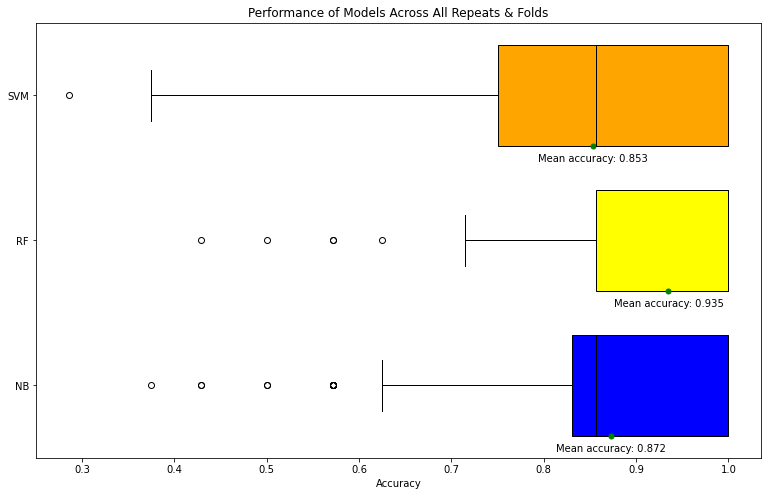

In [18]:
import numpy as np
import matplotlib.pyplot as plt

model = [nb_scores, rf_scores, svm_scores]
model_name = ['NB', 'RF', 'SVM']
colors = ['blue','yellow', 'orange']

fig, ax = plt.subplots(figsize=(13, 8))
boxplot = ax.boxplot(model, labels=model_name, patch_artist=True, vert=False, widths=0.7)

for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

mean_scores = [np.mean(scores) for scores in model]
medians = [item.get_ydata()[0] for item in boxplot['medians']]

for i, (mean_score, median) in enumerate(zip(mean_scores, medians)):
    ax.text(mean_score, median - 0.05,
            f'Mean accuracy: {mean_score:.3f}',
            ha='center', va='top')

    
    ax.plot(mean_score, median, marker='o', markersize=5, color='green')
    boxplot['medians'][i].set_color('black')
ax.set_xlabel('Accuracy')
ax.set_title('Performance of Models Across All Repeats & Folds')
plt.show()

## T test

In [19]:
from sklearn import metrics
from scipy.stats import ttest_rel


t_stat, p_value = ttest_rel(nb_scores, rf_scores)
print("T-Test Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Test Results:
T-Statistic: -12.059916576945067
P-Value: 1.4380790846166746e-29


## AUC-ROC

In [20]:
nb_probs = gnb.fit(X, y).predict_proba(X)
nb_auc = metrics.roc_auc_score(y, nb_probs[:, 1])

rf_predictions = rf.fit(X, y).predict_proba(X)
rf_auc = metrics.roc_auc_score(y, rf_predictions[:, 1])

print("GNB AUC-ROC:", nb_auc)
print("Random Forest AUC-ROC:", rf_auc)


GNB AUC-ROC: 0.973604826546003
Random Forest AUC-ROC: 1.0


## Final model interpretation

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

rf.fit(X, y)
pd.DataFrame({'Variable':X.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)




,Variable,Importance
4,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.239515
7,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.199688
2,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.126451
9,"Values__fft_coefficient__attr_""imag""__coeff_1",0.088819
0,Values__cwt_coefficients__coeff_1__w_2__widths...,0.073804
8,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.071483
6,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.068457
3,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.063572
5,"Values__change_quantiles__f_agg_""var""__isabs_F...",0.035290
1,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.032920


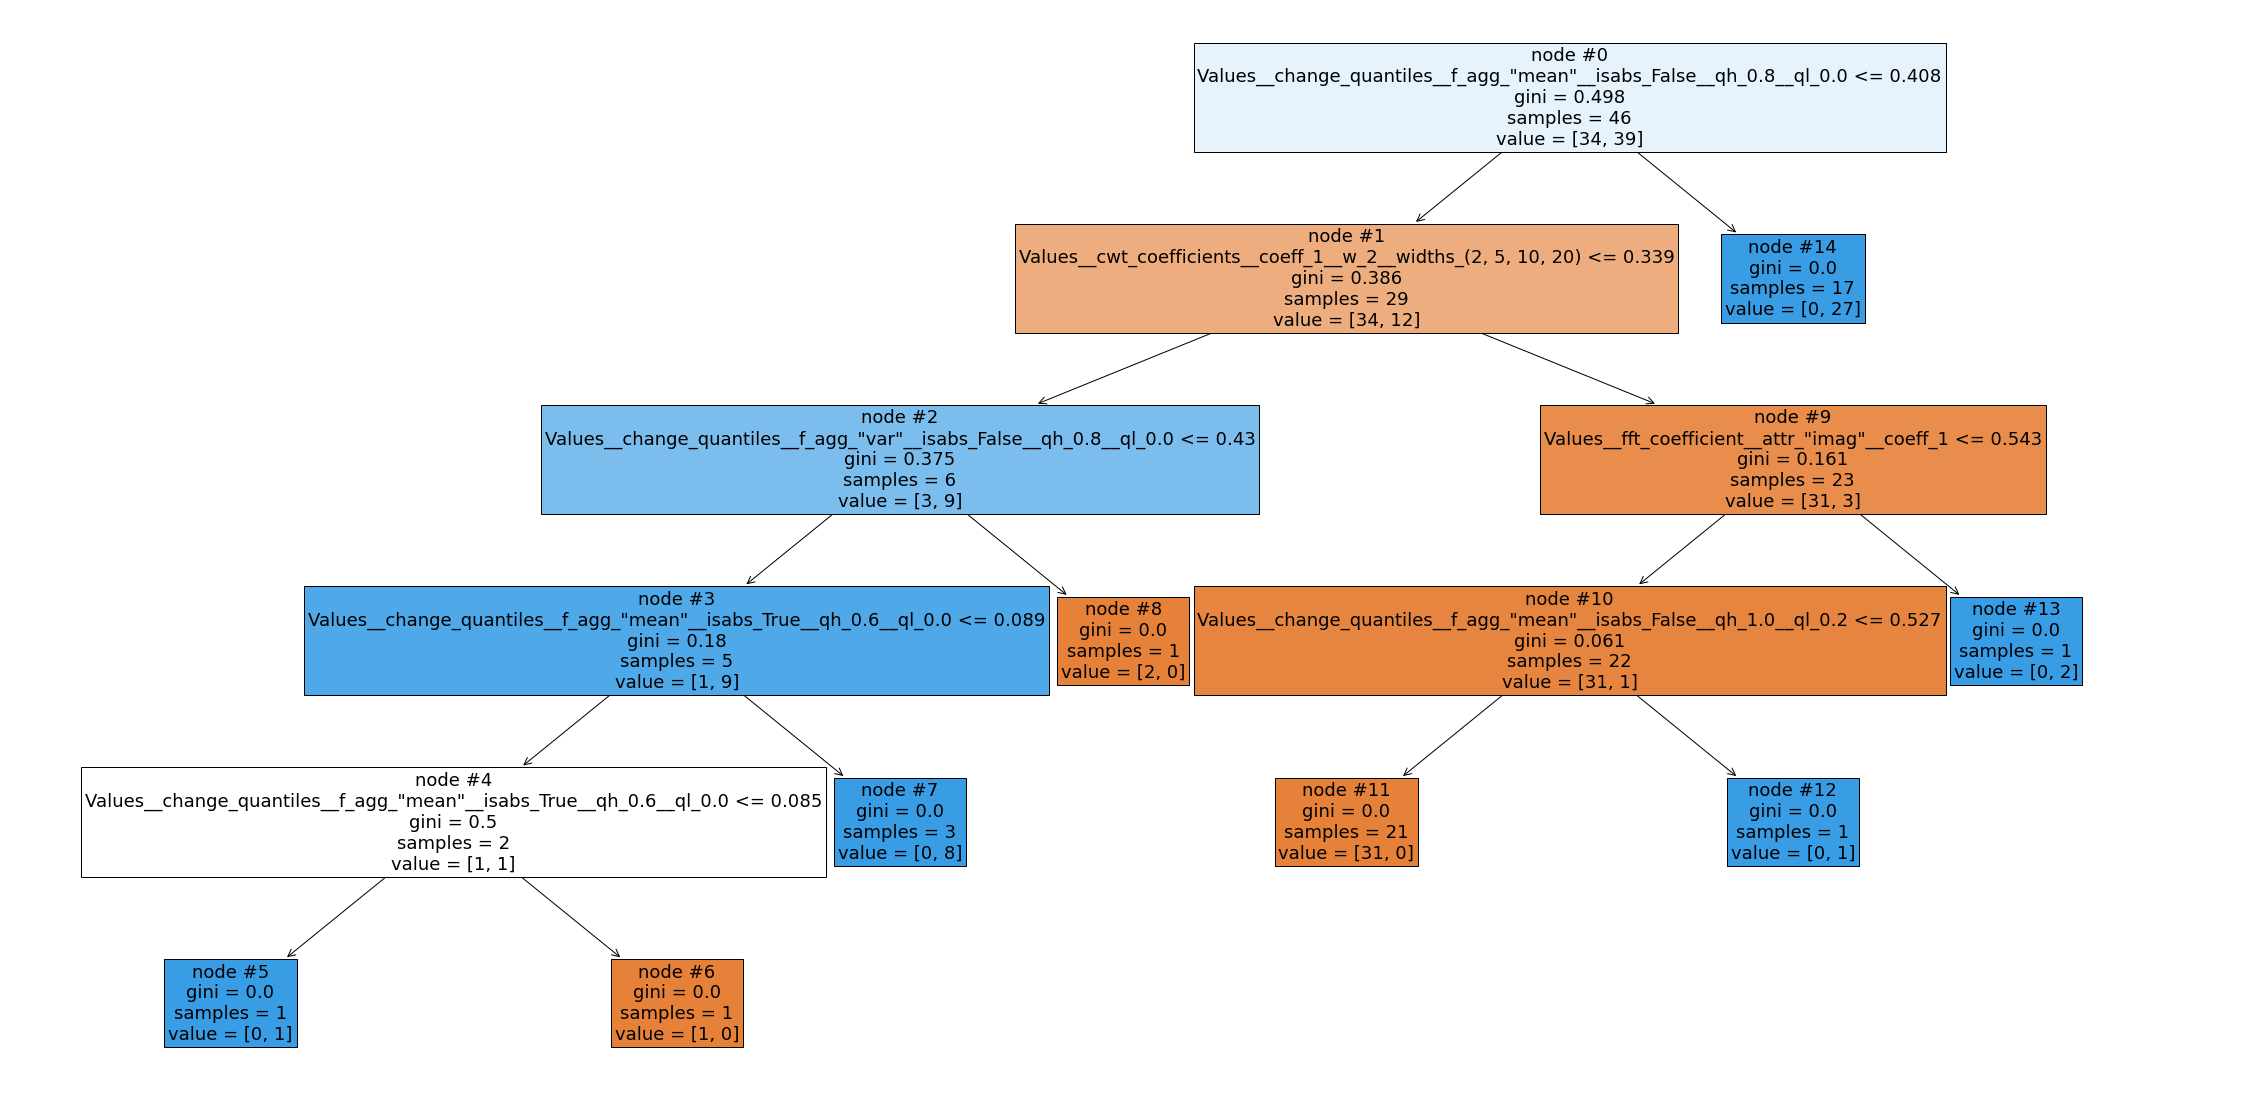

In [22]:
rf.fit(X, y)
tree_to_visualize = rf.estimators_[0] 
plt.figure(figsize=(40, 20))
tree.plot_tree(tree_to_visualize, feature_names=X.columns, fontsize=18, 
               filled=True, node_ids=True )
plt.show()
